In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('../input/train.csv')
test=pd.read_csv('../input/test.csv')

In [3]:
df=df.drop('User_ID',axis=1)
df=df.drop('Product_ID',axis=1)

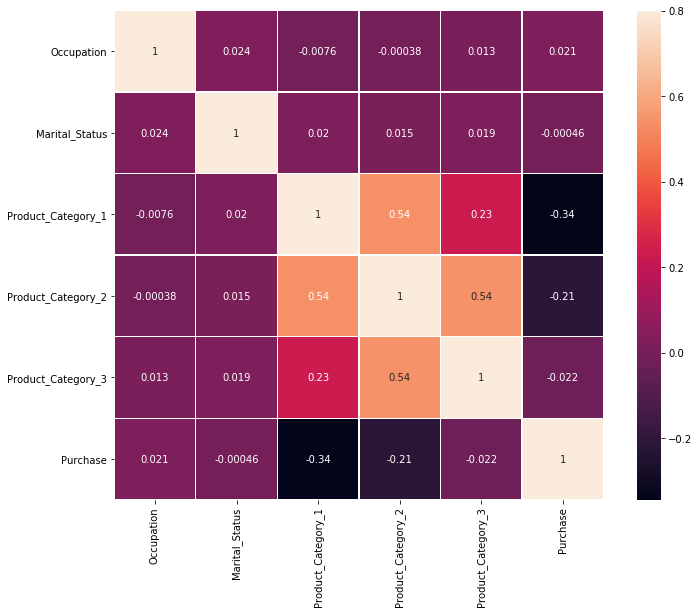

In [4]:
corrmat=df.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8, square= True,annot=True,linewidths=.5,)
plt.show()

In [5]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

Text(0.5, 1.0, 'Age distribution of all customers')

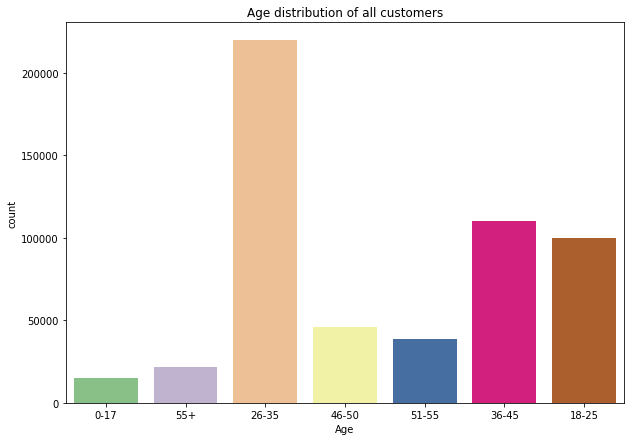

In [6]:
plt.figure(1, figsize=(10, 7))
sns.countplot( x= 'Age', data=df, palette='Accent')
plt.title('Age distribution of all customers')

This shows maximum customers belong to 26-35

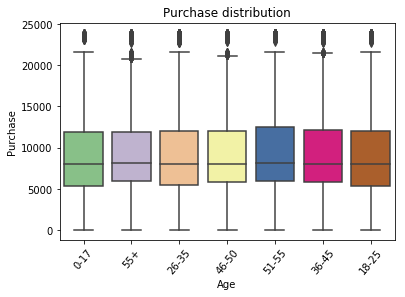

In [7]:
sns.boxplot(x = 'Age', y = 'Purchase', data = df,palette='Accent' )
plt.title('Purchase distribution')
plt.xticks(rotation=50)
plt.show()

51-55 are most spending customers

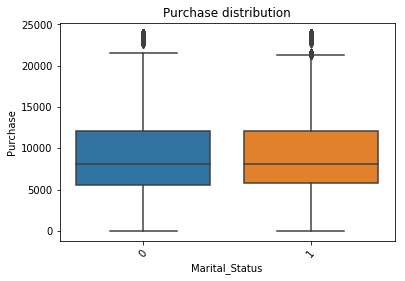

In [8]:
sns.boxplot(x = 'Marital_Status', y = 'Purchase', data = df )
plt.title('Purchase distribution')
plt.xticks(rotation=50)
plt.show()

marriage is not much significant in Purchase.

df=df.drop('Marital_Status',axis=1)
test=test.drop('Marital_Status',axis=1)

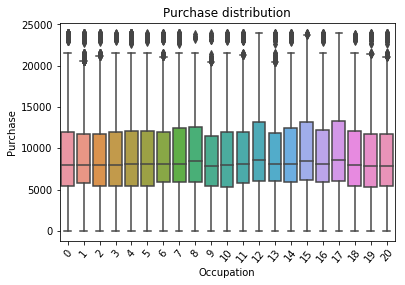

In [9]:
sns.boxplot(x = 'Occupation', y = 'Purchase', data = df )
plt.title('Purchase distribution')
plt.xticks(rotation=50)
plt.show()

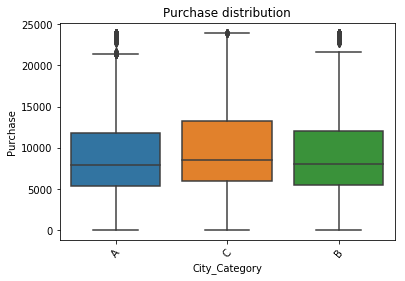

In [10]:
sns.boxplot(x = 'City_Category', y = 'Purchase', data = df )
plt.title('Purchase distribution')
plt.xticks(rotation=50)
plt.show()

People of city C spend most

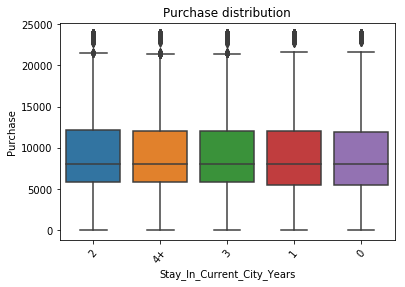

In [11]:
sns.boxplot(x = 'Stay_In_Current_City_Years', y = 'Purchase', data = df )
plt.title('Purchase distribution')
plt.xticks(rotation=50)
plt.show()

Number of years people have lived has no impact

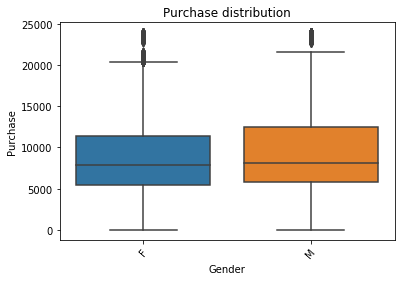

In [12]:
sns.boxplot(x = 'Gender', y = 'Purchase', data = df )
plt.title('Purchase distribution')
plt.xticks(rotation=50)
plt.show()

Male spend more but Female have some outliers

df=df.drop('Stay_In_Current_City_Years',axis=1)
test=test.drop('Stay_In_Current_City_Years',axis=1)

df=df.drop('Stay_In_Current_City_Years',axis=1)
test=test.drop('Stay_In_Current_City_Years',axis=1)

In [13]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

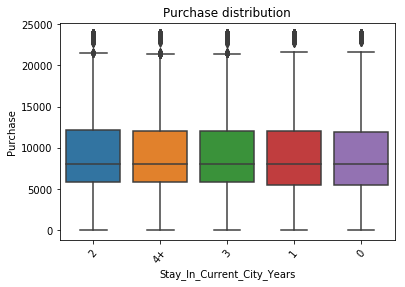

In [14]:
sns.boxplot(x = 'Stay_In_Current_City_Years', y = 'Purchase', data = df )
plt.title('Purchase distribution')
plt.xticks(rotation=50)
plt.show()

In [15]:
df['Gender']=df['Gender'].replace('M',1)
df['Gender']=df['Gender'].replace('F',0)

In [16]:
df['Age']=df['Age'].replace('0-17',15)
df['Age']=df['Age'].replace('18-25',21)
df['Age']=df['Age'].replace('26-35',30)
df['Age']=df['Age'].replace('36-45',40)
df['Age']=df['Age'].replace('46-50',48)
df['Age']=df['Age'].replace('51-55',53)
df['Age']=df['Age'].replace('55+',60)
df['Age']=df['Age'].astype(int)

In [17]:
test['Gender']=test['Gender'].replace('M',1)
test['Gender']=test['Gender'].replace('F',0)

In [18]:
test['Age']=test['Age'].replace('0-17',15)
test['Age']=test['Age'].replace('18-25',21)
test['Age']=test['Age'].replace('26-35',30)
test['Age']=test['Age'].replace('36-45',40)
test['Age']=test['Age'].replace('46-50',48)
test['Age']=test['Age'].replace('51-55',53)
test['Age']=test['Age'].replace('55+',60)
test['Age']=test['Age'].astype(int)

In [19]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,15,10,A,2,0,3,NaN,NaN,8370
1,0,15,10,A,2,0,1,6.0,14.0,15200
2,0,15,10,A,2,0,12,NaN,NaN,1422
3,0,15,10,A,2,0,12,14.0,NaN,1057
4,1,60,16,C,4+,0,8,NaN,NaN,7969


In [20]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+',4)
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [21]:
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].replace('4+',4)
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].astype(int)

In [22]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode())
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode())

In [23]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [24]:
test['Product_Category_2']=test['Product_Category_2'].fillna(test['Product_Category_2'].mode())
test['Product_Category_3']=test['Product_Category_3'].fillna(test['Product_Category_3'].mode())

In [25]:
test=test.drop('User_ID',axis=1)
test=test.drop('Product_ID',axis=1)
df=pd.get_dummies(df,drop_first=True)
test=pd.get_dummies(test,drop_first=True)

In [26]:
df.shape

(550068, 11)

In [27]:
test.shape

(233599, 10)

In [28]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'City_Category_B', 'City_Category_C'],
      dtype='object')

In [29]:
y=df[['Purchase']]
X=df.drop('Purchase',axis=1)

In [30]:
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_Category_B,City_Category_C
0,0,15,10,2,0,3,8.0,16.0,0,0
1,0,15,10,2,0,1,6.0,14.0,0,0
2,0,15,10,2,0,12,NaN,NaN,0,0
3,0,15,10,2,0,12,14.0,NaN,0,0
4,1,60,16,4,0,8,NaN,NaN,0,1


In [31]:
X, test = X.align(test,join='left',axis=1)

In [32]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode())
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode())

In [33]:
test.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_Category_B,City_Category_C
0,1,48,7,2,1,1,11.0,16.0,1,0
1,1,30,17,0,0,3,5.0,NaN,0,1
2,0,40,1,4,1,5,14.0,NaN,1,0
3,0,40,1,4,1,4,9.0,NaN,1,0
4,0,30,1,1,0,4,5.0,12.0,0,1


In [34]:
test['Product_Category_2']=test['Product_Category_2'].fillna(df['Product_Category_2'].mode())
test['Product_Category_3']=test['Product_Category_3'].fillna(df['Product_Category_3'].mode())

In [ ]:
from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
xgb1 = XGBRegressor()
parameters = {'learning_rate':[0.1,0.2,0.5],'n_estimators':[50,100,300,500],
                                     'max_depth':[5,7,10], 'min_child_weight':[0],
                                     'gamma':[0], 'subsample':[0.7],
                                     'colsample_bytree':[0.5],
                                     'objective':['reg:linear'], 'nthread':[-1],
                                     'seed':[100,235],
                                     'reg_alpha':[0.006]
             }
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        verbose=True)
model = Pipeline([
    #('scale',StandardScaler()),
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('reg', xgb_grid)
])
model.fit(X,y)

In [ ]:
best_parameters = model.best_params_
best_accuracy = model.best_score_
print(best_parameters, best_accuracy )

In [35]:
from xgboost import XGBRegressor
regressor = XGBRegressor(cv=5,
                         objective="reg:linear",
                         nrounds=1000,
                         max_depth=10,
                         eta=0.1,
                         colsample_bytree=0.5,
                         seed=235,
                         metric="rmse",
                         importance=1)

regressor.fit(X,y)

[10:33:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, cv=5, eta=0.1, gamma=0,
             importance=1, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=10, metric='rmse', min_child_weight=1,
             missing=None, n_estimators=100, n_jobs=1, nrounds=1000,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=235, silent=None,
             subsample=1, verbosity=1)

In [36]:
y_pred=regressor.predict(X)
#y_pred=model.predict(X)

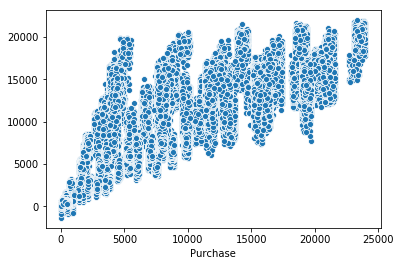

In [37]:
sns.scatterplot(x=y['Purchase'],y=y_pred)

In [38]:
from sklearn import metrics
metrics.r2_score(y,y_pred)

0.6839090652385547

In [39]:
result=pd.read_csv('../input/Sample_Submission.csv')

In [40]:
t=pd.read_csv('../input/test.csv')

In [41]:
result['User_ID']=t['User_ID']

In [42]:
result['Product_ID']=t['Product_ID']

In [43]:
result['Purchase']=regressor.predict(test)

In [44]:
for i in result['Purchase']:
    if (i<185):
        result['Purchase']=result['Purchase'].replace(i,185)
    elif (i>23961):
        result['Purchase']=result['Purchase'].replace(i,23961)

In [45]:
result.to_csv("result.csv")

<a href="./result.csv"> Download File </a>

In [46]:
result.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,13655.483398
1,1000009,P00113442,10973.890625
2,1000010,P00288442,6531.820312
3,1000010,P00145342,2447.026123
4,1000011,P00053842,2959.568848
